In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import pandas as pd

import pickle

from pathlib import Path

import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload

%autoreload 1
%aimport ds_tutorial.datasets

https://www.cs.cornell.edu/people/tj/publications/joachims_98a.pdf

http://www.daviddlewis.com/resources/testcollections/reuters21578/readme.txt

# Explore Reuters-21578

## Load dataset

In [4]:
from ds_tutorial.datasets import ReutersCorpus

In [5]:
data_root = Path.home() / "data" / "tmp"
reuters_documents_path = data_root / "reuters21578" / "documents.pkl"
reuters_corpus_path = data_root / "reuters21578" / "corpus.pkl"

In [6]:
documents = pickle.load(open(reuters_documents_path, "rb"))

In [7]:
reuters = pickle.load(open(reuters_corpus_path, "rb"))

In [8]:
df, top_ten_ids, train_labels, test_labels = reuters.build_dataframe()

KeyError: 0

In [15]:
df

NameError: name 'df' is not defined

In [32]:
df[df.modapte == "train"].shape

(7770, 9)

In [36]:
train, test = reuters.split_modapte()

In [45]:
train_num = 0
test_num = 0
for doc in documents:
    if doc["attrs"]["LEWISSPLIT"] == "TRAIN" and doc["attrs"]["TOPICS"] == "YES":
        train_num += 1
    if doc["attrs"]["LEWISSPLIT"] == "TEST" and doc["attrs"]["TOPICS"] == "YES":
        test_num += 1
    #break

In [46]:
train_num, test_num

(9603, 3299)

## Get some simple stats

In [11]:
number_of_samples = reuters.number_of_samples
number_of_classes = reuters.number_of_classes
number_of_samples_per_class = int(np.average([tc for tc in reuters.topic_counts.values() if tc > 1]))
number_of_words_per_sample = int(np.median([len(d["text"].split()) for d in reuters.docs]))
samples_to_words_per_sample_ratio = int(number_of_samples / number_of_words_per_sample)

In [12]:
nchars = 52
print("Number of samples:".ljust(nchars), reuters.number_of_samples)
print("Number of classes:".ljust(nchars), reuters.number_of_classes)
print("Number of samples per class:".ljust(nchars), number_of_samples_per_class)
print("Number of words per sample:".ljust(nchars), number_of_words_per_sample)
print("Number of samples/number of words per sample ratio:".ljust(nchars), samples_to_words_per_sample_ratio)

Number of samples:                                   10789
Number of classes:                                   117
Number of samples per class:                         132
Number of words per sample:                          89
Number of samples/number of words per sample ratio:  121


## Distribution of sample length for reuters21578

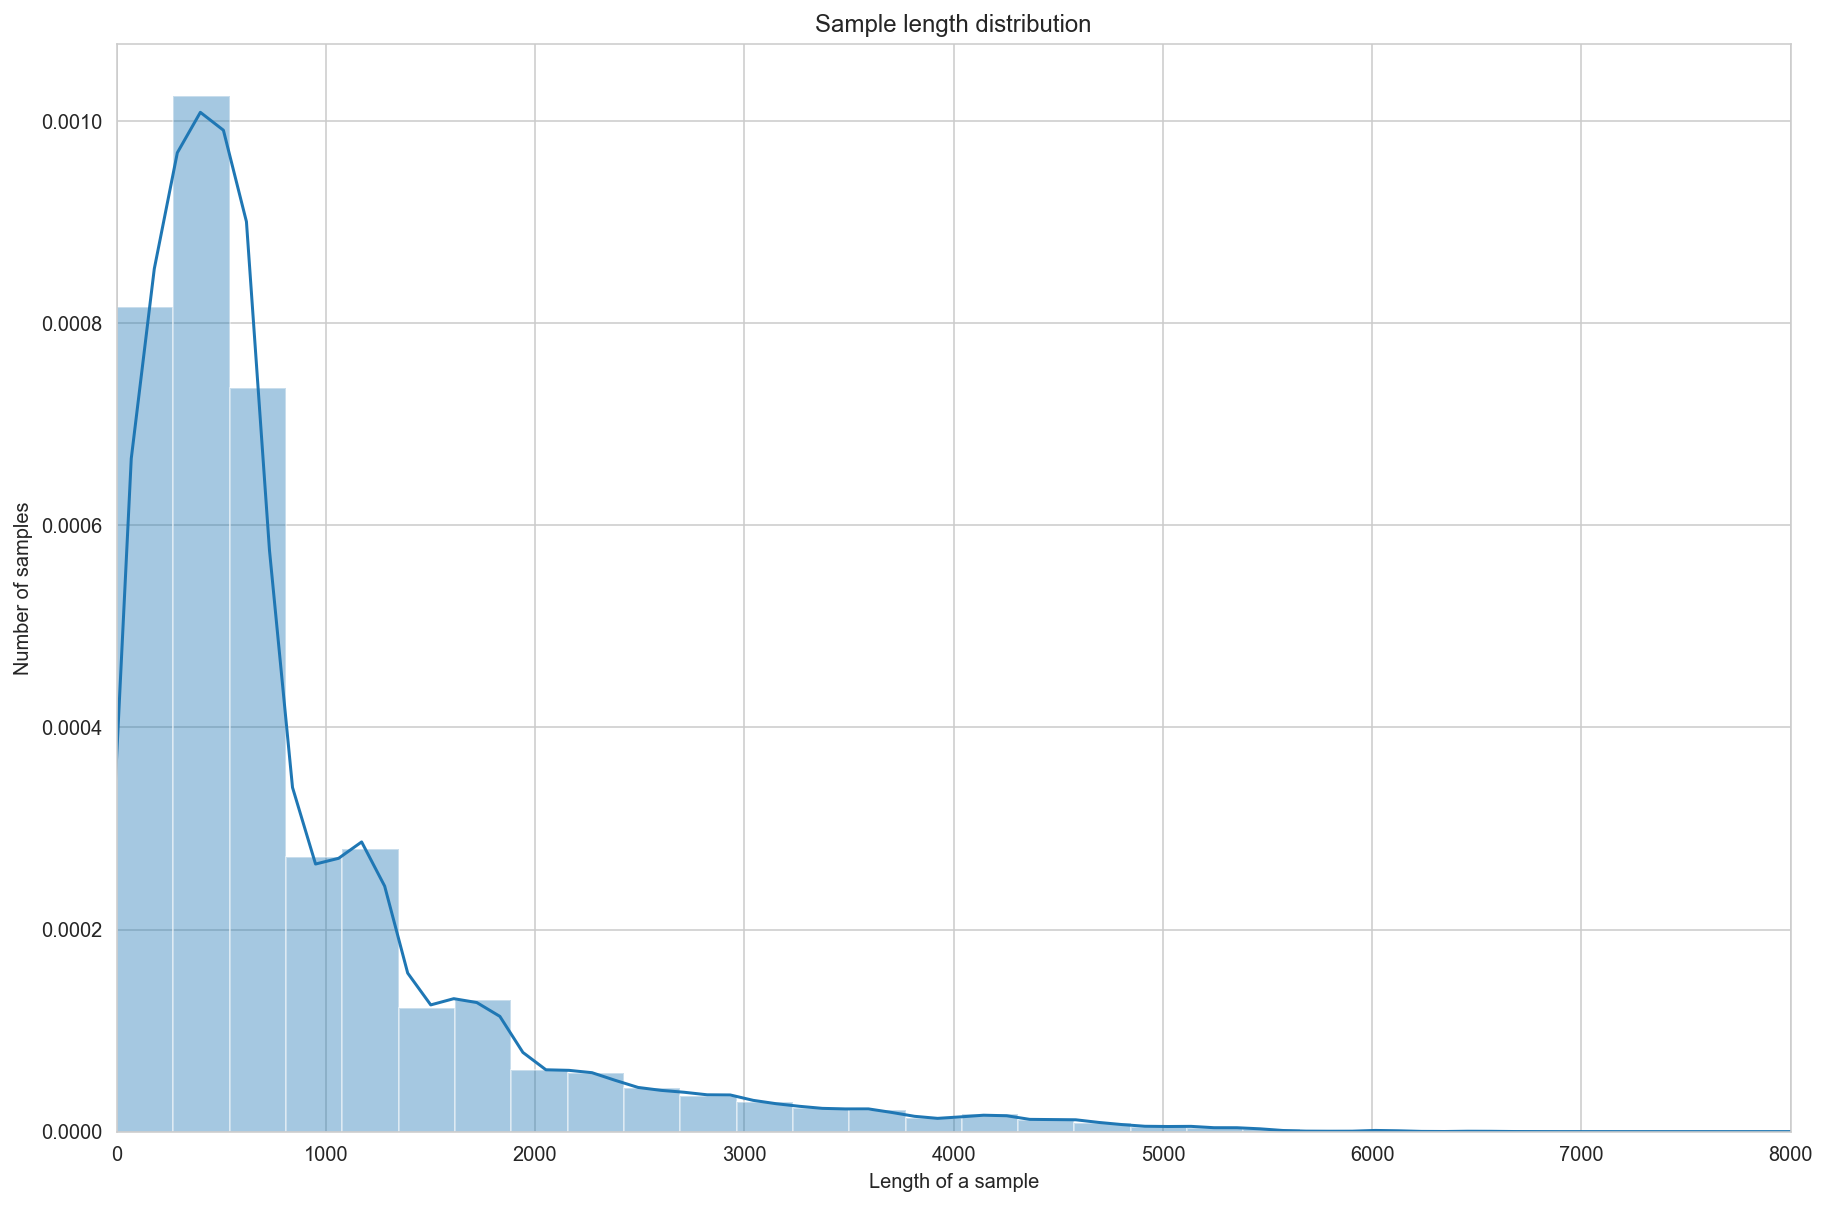

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot([len(d["text"]) for d in reuters.docs], kde=True, ax=ax)
ax.set_title('Sample length distribution')
ax.set_xlabel('Length of a sample')
ax.set_xlim(0, 8000)
_ = ax.set_ylabel('Number of samples')

## Word frequency distribution

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
kwargs = {
        'ngram_range': (1, 1),
        'dtype': 'int32',
        'strip_accents': 'unicode',
        'decode_error': 'replace',
        'analyzer': 'word',  # Split text into word tokens.
}
vectorizer = CountVectorizer(**kwargs)
vectorized_texts = vectorizer.fit_transform(reuters.texts)
all_ngrams = list(vectorizer.get_feature_names())
all_counts = vectorized_texts.sum(axis=0).tolist()[0]
all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(
    zip(all_counts, all_ngrams), reverse=True)])

num_ngrams=50
ngrams = list(all_ngrams)[:num_ngrams]
counts = list(all_counts)[:num_ngrams]
idx = np.arange(num_ngrams)

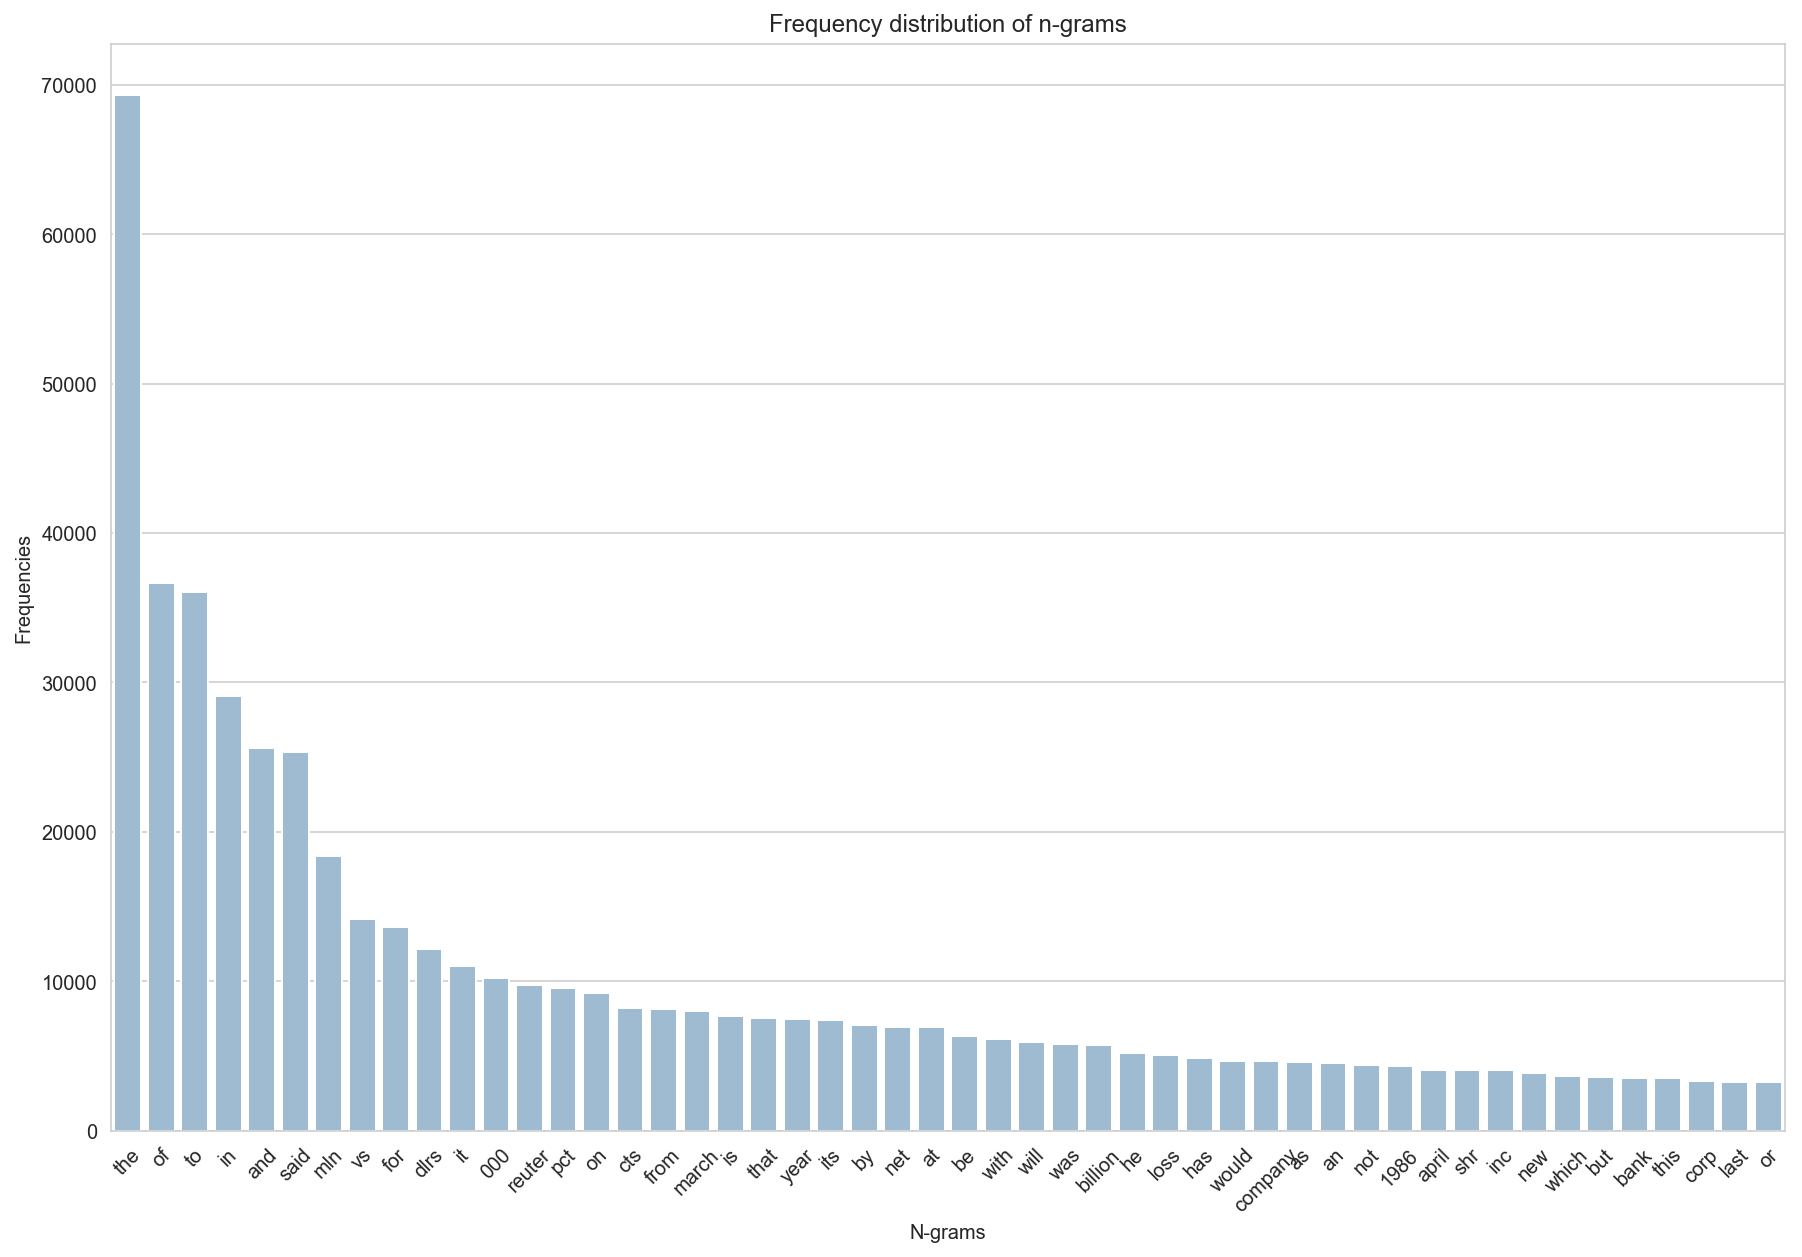

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=ngrams, y=counts, ax=ax, color="#95BCD9")
ax.set_title('Sample length distribution')
plt.xlabel('N-grams')
_ = plt.ylabel('Frequencies')
_ = plt.title('Frequency distribution of n-grams')
_ = plt.xticks(idx, ngrams, rotation=45)

## Choose a model flowchart

In [142]:
from IPython.display import Image
from IPython.core.display import HTML
print("Number of samples/number of words per sample ratio: ", samples_to_words_per_sample_ratio)
Image(url=(
    "https://developers.google.com/machine-learning/guides/"
    "text-classification/images/TextClassificationFlowchart.png"
))

Number of samples/number of words per sample ratio:  121
